Import all nessesary libarys

In [9]:
import numpy as np
#import cupy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy import stats
%matplotlib inline

Definitions of all interchangeable variables of the script

In [10]:
# Definitions

# Matrix size

matrix_width = 50
matrix_height = 50

# Grayscale value range

gray_value_min = 0
gray_value_max = 32


# dampening factor

beta = 1

#itterations

itteration = 300

# definition Mask

mask = np.array([
        [-0.81,0,0,0,-0.81],
        [0,0.91,0.4,0.91,0],
        [0,0.4,0,0.4,0],
        [0,0.91,0.4,0.91,0],
        [-0.81,0,0,0,-0.81]
       ])

# definition Energyfunction

def energy(func, vst, xs, xt):
    #switch (func):
        #case orgf:
            #return np.sum(vst * (xs - xt))
        #case l1:
            return np.sum(vst * np.absolute(xs - xt))
            #check formula in the book  
        #case l2:
            #return np.sum(vst * (xs - xt)**2 )

applys the mask to the selected data point of the matrix

In [11]:
def apply_mask(height,width, matrix, mask):
    # create a copy of the matrix in the area of the mask
    slice = matrix.take(range((height - (mask.shape[0]-1)//2),(height + (mask.shape[0]+1)//2)),mode='wrap', axis=0).take(range((width - (mask.shape[1]-1)//2),(width + (mask.shape[1]+1)//2)),mode='wrap',axis=1)
    # calculate the probability of a data point to flip
    
    xk = np.arange(gray_value_max)
    pk = []
    denominator = 
    for i in xk do:
        pk[i] = (scipy.special.binom(gray_value_max, i)* np.exp(-beta*energy(l1, mask, matrix[height][width], slice))) / denominator
                 
    #probability = 1 / (1 + np.exp(-beta *np.sum(mask * np.absolute(matrix[height][width] - slice))))
    # würfeln ob der daten punkt eine 1 ist (?good englisch expression?)
    # aktuell berechne ich die warscheinlichkeit obs eine 1 wird.. muss ich die wahrscheinlichkeit haben ob es flipt? wenn flip dann was tun bei mehr als 2 möglichkeiten
        #matrix[height][width] = binom.rvs(1,p=probability) - does not work.. does not set -1 but 0s instead

    np.random.choice()
    
    return matrix
    

SyntaxError: invalid syntax (2700875669.py, line 14)

generate Matrix of white noise

CPU times: user 32.1 ms, sys: 811 µs, total: 32.9 ms
Wall time: 29.7 ms


array([[ 6, 12,  4, ...,  7,  1, 28],
       [ 3, 11, 24, ..., 23, 31, 20],
       [ 9, 23, 20, ..., 15,  1,  2],
       ...,
       [ 2, 25, 10, ..., 19, 30,  8],
       [29, 11,  1, ..., 23, 14,  9],
       [10, 28, 13, ..., 18, 28, 25]])

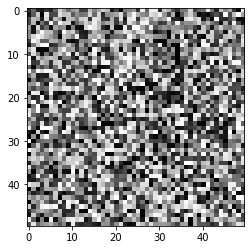

In [8]:
%%time
# generate Matrix of white noise
matrix = np.random.randint(gray_value_min,gray_value_max,size=(matrix_height,matrix_width))
# replaces 0 in the matrix with -1s (nessesary for a few masks)
# matrix = np.where(matrix == 0, -1, matrix)
# Print matrix as Image
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)
# Return (and print) matrix
matrix

apply mask to whole matrix

In [96]:
%%time
# itterate thrue the whole matrix and appy mask
counter = 0
while counter < itteration:
    counter += 1
    for h in range(0, matrix.shape[0]):
        for w in range(0, matrix.shape[1]):
            matrix = apply_mask(h,w,matrix,mask) #faster with inplace ?
        

CPU times: user 1min 28s, sys: 68.7 ms, total: 1min 28s
Wall time: 1min 29s


plot new matrix

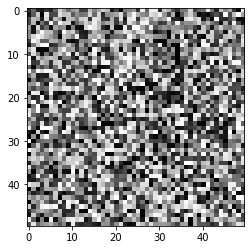

In [9]:
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)

safe new matrix to file

In [ ]:
np.save("matrix", matrix)

Fragen für Mittwoch:
Formel (was liegt mit in der summe? O.o)
        e^-2 abhängigkeit zu anz graustufen
        mehrere pixel zeitgleich angucken (maske gerade anzahl (8x8 oder so mit 4 mittleren pixeln)
        exponenten ersetzen.. wie genau soll ich das umsetzen? O.o
        und wo genau brauch ich fakultäten